#Task 2

A particle $M$ (mass $m$) is moving inside of the cylindrical channel of the moving object $D$. The object $D$ has a radius $r$. No friction between $M$ and $D$.

Determine the equation of the relative motion of this particle $x=f(t)$. Also you need to find the pressure force the particle acting on the channel wall.

At the end, you should provide:
- simulate this mechanism (obtain all positions);
- show all acceleration components, inertial forces, gravity force and $N$;
- plot of the particle $x(t)$, till the time, while point won't leave the channel;
- plot $N(t)$ , till the time, while point won't leave the channel.

Needed variables:\\
$m=0.02,\ \omega=\pi,\ a = 60,\ \alpha=45^\circ$;\\
Initial conditions: $t_0=0,\ x_0=0,\ \dot{x}_0=0.4$.


![HW5](https://drive.google.com/uc?export=view&id=1kHVY2P_HLX0yrSqA3j7T2EAaZ-3tprCu)


###**Needed variables:**
- $m = 0.02$
- $\omega = \pi$
- $a = 60$
- $\alpha=45^\circ$

###Initial conditions:
$t_0=0,\ x_0=0,\ \dot{x}_0=0.4$



##Researh object:
System that consists of a point M (a particle) and a tube inside a rotating triangle

##Motion:
M - rectilinear, OA - rotational

##Kinematic analysis
We need to know the directions of all accelerations (inertial forces components).

##Force analysis:
$m \vec g$, $\vec N$,

$\vec Φ^{tr} = -ma_{n}^{tr} = -m \omega^2 R$, where $R=O1M(\phi)$.

$\vec{\Phi}_{\text{cor}} = -m\mathbf{a}^{\text{cor}} = -2m \cdot \omega \times \mathbf{v}^{\text{rel}}$


###**Solution:**

Since the triangle rotates with const angular speed, $ϵ=0$, and so $a_\tau = 0$

Projections:

\begin{cases}
 X: -mg*sin(\beta) - m \omega^2 R sin(\gamma) &=  ma_x \tag{1} \\
 Y: N + 2*mg \omega N^{rel} - mg cos(\beta) + m \omega^2 R cos(\gamma)&= 0  
\end{cases}


By cos theorem:

$$(a\sqrt{2})^2 = (a\sqrt{2}-x)^2 + R^2 - 2(a\sqrt{2}-x)R\cos(\beta)$$

$$\cos \beta = \frac{(a\sqrt{2})^2 - (a\sqrt{2}-x)^2 - R^2}{2(a\sqrt{2}-x)}$$

We need to integrate the equation (1) while the point is inside the tube.
Then, substitute the values into the second equation to get $N$.

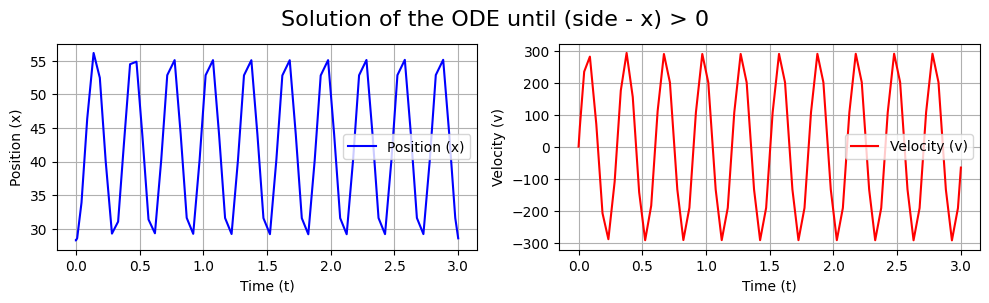

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the constants
g = 9.81
omega = np.pi
a = 60
side = a*np.sqrt(2)

# Define the system of ODEs
def system(t, y):
    x, v = y
    R = np.sqrt(a**2 + x**2 - 2*a*x*np.cos(np.pi/4))
    beta = np.arcsin(a*np.sin(np.pi/4) / R)
    dxdt = v
    cos_beta = (a**2 -(side-x)**2-R**2)/(2*side-2*x)
    dvdt = -g * np.sin(np.pi/4 - omega*t) - omega**2 * cos_beta * R

    return [dxdt, dvdt]

# Event function to stop integration when (a - x) > 0
def event_stop(t, y):
    return side - y[0]  # stop when (a - x) > 0

# Initial conditions: x(0), x'(0) = 0.4
# y0 = [30*np.sqrt(2), 0.4]
y0 = [side/3, 0.4]

# Time span for the solution
t_span = (0, 3)

# Solve the ODE with event stopping condition
sol = solve_ivp(system, t_span, y0, events=event_stop)

# Extract the solution
t_vals = sol.t
x_vals = sol.y[0]
v_vals = sol.y[1]

# Plotting the solution
plt.figure(figsize=(10,8))
plt.subplot(3, 2, 1)
plt.plot(t_vals, x_vals, color='blue', linestyle='-', label='Position (x)')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t_vals, v_vals, color='red', label='Velocity (v)')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.grid(True)

plt.suptitle('Solution of the ODE until (side - x) > 0', fontsize=16)
plt.tight_layout()
plt.show()

##Plotting the forces and accelerations.

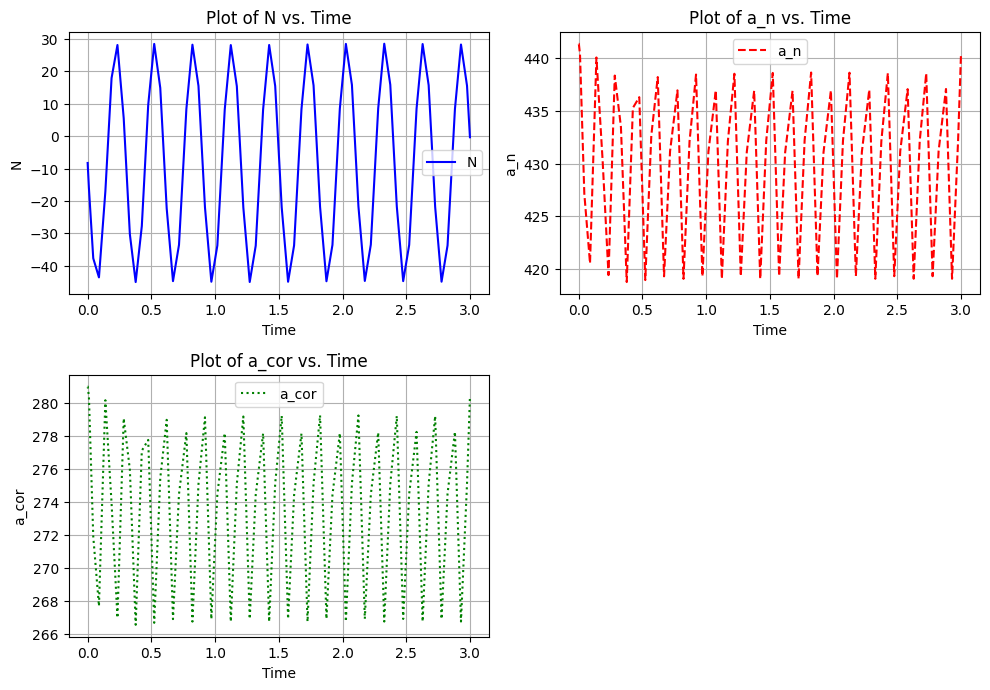

In [10]:
# Define the constants
m = 0.02
omega = np.pi
a = 60

a_cor, a_n = [], []
N = []
f_cor, f_centrip = [], []

for i in range(len(v_vals)):
  R = np.sqrt(a**2 + x_vals[i]**2 - 2*a*x_vals[i]*np.cos(np.pi/4))
  beta = np.arcsin(a*np.sin(np.pi/4) / R)
  a_cor.append(2*omega*R)
  a_n.append(omega**2*R)
  N.append(m*g*np.cos(np.pi/4-omega*t_vals[i]) - m*omega**2*R*np.sin(beta) - 2*m*omega*v_vals[i])
  f_cor.append(-2*m*omega*v_vals[i])
  f_centrip.append(-m*omega**2*R)

plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.plot(t_vals, N, color='blue', linestyle='-', label='N')
plt.xlabel('Time')
plt.ylabel('N')
plt.title('Plot of N vs. Time')
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(t_vals, a_n, color='red', linestyle='--', label='a_n')
plt.xlabel('Time')
plt.ylabel('a_n')
plt.title('Plot of a_n vs. Time')
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(t_vals, a_cor, color='green', linestyle=':', label='a_cor')
plt.xlabel('Time')
plt.ylabel('a_cor')
plt.title('Plot of a_cor vs. Time')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
import sympy as sp
from sympy import Point, cos, sin, sqrt, pi, Matrix

g = 9.81
omega = np.pi
a = 60
O1A = 60
O1O = 60
OA = 60*sqrt(2)

phi_vals = [omega*t_val for t_val in t_vals]
random_vals = [2*np.sin(30)*t for t in t_vals]

O1 = Point(80, 0)
fixed_points_with_names = [(O1, "O1")]


O_vec = [Point(sp.cos(phi_val), sp.sin(phi_val))*O1O + O1 for phi_val in phi_vals]
A_vec = [Point(sp.cos(phi_val - pi/2), sp.sin(phi_val - pi/2))*O1A + O1 for phi_val in phi_vals]

OA_vec = [(A-O)/OA for A, O in zip(A_vec, O_vec)]
vel_vec = [OA*vel_magnitude for OA, vel_magnitude in zip(OA_vec, v_vals)]
a_cor_vec = [Point(OA.y, -OA.x)*abs(a_cor_magnitude) for OA, a_cor_magnitude in zip(OA_vec, a_cor)]

OA_vec_mag_for_N = [OA*N_magnitudes for OA, N_magnitudes in zip(OA_vec, N)]

N_vec = [Point(mag_for_N.y, -mag_for_N.x)*N_magnitudes for mag_for_N, N_magnitudes in zip(OA_vec_mag_for_N, N)]

M_vec = [(1-x/OA)*A + x/OA*O for A, O, x in zip(A_vec, O_vec, x_vals)]
a_n_norm_vec = [O1 - M for M in M_vec]
a_n_vec = [a_n_norm*a_n_magnitudes for a_n_norm, a_n_magnitudes in zip(a_n_norm_vec, a_n)]

f_centripetal_vec = [Point(-a_n.x, -a_n.y)*abs(f_centrip_magnitude) for a_n, f_centrip_magnitude in zip(a_n_norm_vec, f_centrip)]
f_cor_vec = [Point(-a_cor.x, -a_cor.y)*abs(f_cor_megnitude) for f_cor_megnitude, a_cor in zip(f_cor, a_cor_vec)]



##Simulation

In [12]:
from sympy import *
from sympy import Symbol, Ellipse, Point, Line, Circle, Matrix, diff
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.lines as mlines
import numpy as np

g = 9.81
omega = sp.pi
m = 0.02
a = 60
alpha = sp.pi/4

mg = m*g

points_vals = zip(O_vec, A_vec, M_vec)
accelerations_vals = zip(a_n_vec, a_cor_vec)
forces_vals = zip(f_centripetal_vec, N_vec, f_cor_vec)




points_names = ["A", "O", "M"]

states = zip(points_vals, accelerations_vals, forces_vals)

fixed_points_with_names = [(O1, "O1")]


fig, ax = plt.subplots()
ax.set_aspect("equal")


xdata, ydata = [], []
ln, = plt.plot([], [], 'b-')

vectors = []
points  = []

titles  = []
lines   = []

# Animation initialisation
def init_model():
    ax.set_xlim(0, 210)
    ax.set_ylim(-70, 70)
    plt.title('Simulation')
    return ln,


# Remove all the previous points, labels, vectors
def clear_screen():
    if len(ax.patches):
        ax.patches[-1].remove()

    while len(points):
        for item in points[-1]:
            item.remove()
        points.pop()

    while len(lines):
        for item in lines[-1]:
            item.remove()
        lines.pop()

    while len(titles):
        titles[-1].remove()
        titles.pop()

    while len(vectors):
        vectors[-1].remove()
        vectors.pop()

# Animation update on each frame
def update_model(state):

    clear_screen()

    (positions, accelerations, forces) = state
    (O, A, M) = positions
    (acc_n, acc_cor) = accelerations
    (F_centrip, N, F_cor) = forces

    titles.extend([
        ax.text(i[0][0], i[0][1] + 3, i[1], fontsize=10)
        for i in zip((A, O, M), ("A", "O", "M"))
    ])

    # (A, O) = state
    points.extend([
        plt.plot(point[0], point[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        for (point, _) in fixed_points_with_names
    ])

    # Plot all lines on the screen
    lines.extend([
        plt.plot([O1[0], A[0]], [O1[1], A[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([O1[0], O[0]], [O1[1], O[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([A[0], O[0]], [A[1], O[1]], linestyle="solid", linewidth=2, color="blue"),

    ])


    # Draw all moving points of interest on the screen
    points.extend([
        plt.plot(i[0], i[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        for i in (O, A, M)
    ])

    # Draw all the acceleration and forces vectors on the plot
    vectors.extend([
        plt.quiver([float(M[0].evalf())], [float(M[1].evalf())], [float(acc_n[0])], [float(acc_n[1])], color="red", units='xy', scale = 600, scale_units='xy', angles='xy')
    ])

    vectors.extend([
        plt.quiver([float(M[0].evalf())], [float(M[1].evalf())], [float(acc_cor[0])], [float(acc_cor[1])], color="magenta", units='xy', scale = 10, scale_units='xy', angles='xy')
    ])

    vectors.extend([
        plt.quiver([float(M[0].evalf())], [float(M[1].evalf())], [float(F_centrip[0])], [float(F_centrip[1])], color="green", units='xy', scale = 7, scale_units='xy', angles='xy')
    ])

    vectors.extend([
        plt.quiver([float(M[0].evalf())], [float(M[1].evalf())], [float(N[0])], [float(N[1])], color="blue", units='xy', scale = 70, scale_units='xy', angles='xy')
    ])


    vectors.extend([
        plt.quiver([float(M[0].evalf())], [float(M[1].evalf())], [float(F_cor[0])], [float(F_cor[1])], color="orange", units='xy', scale = 70, scale_units='xy', angles='xy')
    ])

    vectors.extend([
        plt.quiver([float(M[0].evalf())], [float(M[1].evalf())], [0], [-mg], color="black", units='xy', scale = .01, scale_units='xy', angles='xy')
    ])

    add_legend()
    return ln,

def add_legend():
  legend_entries = [
    mlines.Line2D([], [], color='black', marker='_', linestyle='None', markersize=10, label='mg'),
    mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='N'),
    mlines.Line2D([], [], color='green', marker='_', linestyle='None', markersize=10, label='F_centripetal'),
    mlines.Line2D([], [], color='orange', marker='_', linestyle='None', markersize=10, label='F_coriolis'),
    mlines.Line2D([], [], color='red', marker='_', linestyle='None', markersize=10, label='Acceleration (normal)'),
    mlines.Line2D([], [], color='magenta', marker='_', linestyle='None', markersize=10, label='Acceleration (coriolis)'),
  ]

  ax.legend(handles=legend_entries, loc='upper right')


anim = FuncAnimation(fig, update_model, frames=states,
                        init_func=init_model, blit=True)


from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close(fig)

<ipython-input-12-9f87f82e41ac>:153: UserWarning: frames=<zip object at 0x7b0ee0400140> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, update_model, frames=states,
